# Results of analysis

Reading LiME_Binning output

In [77]:
#file = "../../Bio_Project/results/LiME_binning_all_250000_paired/all_250000_1+RC.fasta.a16.t20.txt"
file = "../../all_250000_1+RC.fasta.a16.t20_2.txt"
file = "../../all_250000_1+RC.fasta.a16.t20.txt"

In [78]:
f = open(file, "r")

In [79]:
l = []
for x in f:
    l.append(int(x))

f.close()
print("number of reads: ", len(l))

max_val = max(l)

s = []
for x in range(0, max_val+1):
    s.append(0)
    
print("number of clusters: ", len(s))

for i in range(0, len(l)):
    temp = l[i]
    s[temp] = s[temp] + 1


max_set_size = max(s)

max_set = s.index(max_set_size)
print("max set size: ", max_set_size)
print("max set index: ", max_set)

count=0;
for i in range(0, len(s)):
    if s[i]==1:
        count=count + 1

print("number of non grouped reads: ", count)

sorted_s = s

sorted_s.sort(reverse=True)

print("Sizes of ten largest sets:")
for i in range(0, 10):
    print(sorted_s[i])

number of reads:  3125000
number of clusters:  735204
max set size:  62921
max set index:  540108
number of non grouped reads:  305631
Sizes of ten largest sets:
62921
62500
62500
62500
62500
62500
62500
62500
62500
62500


In [80]:
cluster_dict = {}

for cluster in l:
    
    if cluster in cluster_dict.keys():
        cluster_dict[cluster] = cluster_dict[cluster] + 1 
    
    else:
        cluster_dict[cluster] = 1

print("len cluster dict: ", len(cluster_dict))

sorted_tuples = sorted(cluster_dict.items(), key=lambda item: item[1], reverse = True)

sorted_dict = {k: v for k, v in sorted_tuples}

len cluster dict:  735204


In [81]:
k = 20 

top_k_cluster = []

i = 0
for cluster, cardinality in sorted_dict.items():
    
    if i <= k:
        top_k_cluster.append([cluster, cardinality])
    
    else:
        break
        
    i = i + 1
    
print(top_k_cluster)

[[540108, 62921], [735195, 62500], [735196, 62500], [735197, 62500], [735198, 62500], [735199, 62500], [735200, 62500], [735201, 62500], [735202, 62500], [735203, 62500], [19, 32022], [232398, 11933], [571274, 7826], [44341, 4965], [155032, 4894], [346732, 1558], [18303, 1265], [236472, 1100], [139082, 899], [571417, 730], [630918, 683]]


In [82]:
import matplotlib.pyplot as plt

def plotALot(cluster_to_show,threshold):

    x = []
    y = []

    for i in range(len(cluster_to_show)):
        x.append(str(cluster_to_show[i][0]))
        y.append(cluster_to_show[i][1])


    plt.figure(figsize=(15,10))
    width = 0.4
    plt.bar(x,y,width=width,color='lightblue',label='Total elements in the cluster')

    plt.xlabel('Cluster',fontsize=14)
    plt.ylabel('Number of reads',fontsize=14)
    plt.legend(loc='upper right')
    plt.title('Top clusters which cover '+str(threshold)+'% of the total',fontweight='bold',fontsize=20)

## GRAFICO UNO

len of cluster_to_show list:  9
cluster_to_show list:
[[10, 1314601], [64619, 62500], [64620, 62500], [64621, 62500], [64622, 62500], [64623, 62500], [64624, 62500], [64625, 62500], [64626, 62500]]


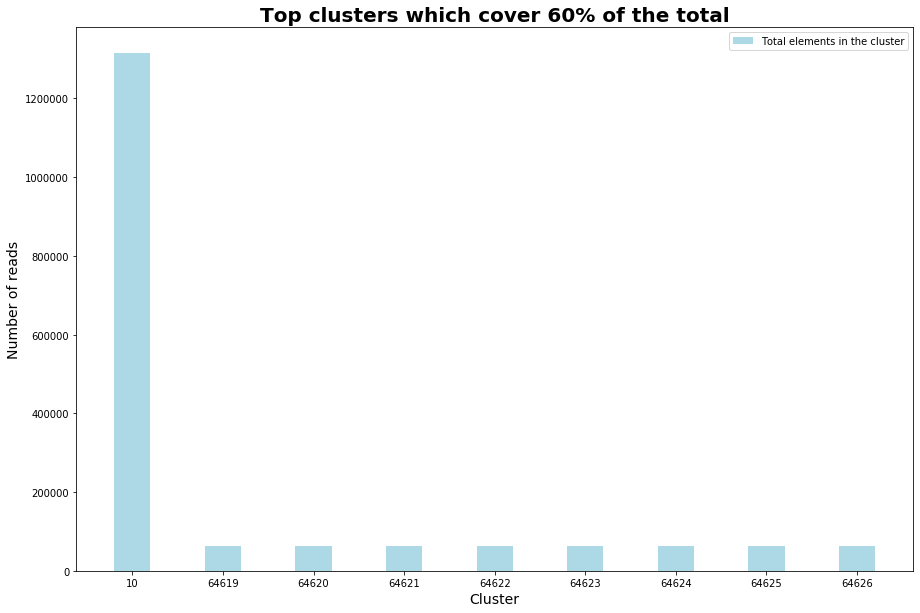

In [76]:
tot_reads = len(l) # number of read clustered
read = 0 # read counter
threshold = 60 # percentage threshold  

cluster_to_show = [] # list of [cluster, cardinality] pairs 

for cluster, cardinality in sorted_dict.items():
    
    read = read + cardinality
    
    if read / tot_reads * 100 <= threshold:
        cluster_to_show.append([cluster, cardinality])
        
    else:
        break

print("len of cluster_to_show list: ", len(cluster_to_show))
print("cluster_to_show list:")
print(cluster_to_show)

plotALot(cluster_to_show,threshold)

#in this way I can show clusters which cover the "threshold" part of the entire reads.

## GRAFICO DUE

len of cluster_to_show list:  15
cluster_to_show list:
[[540108, 62921], [735195, 62500], [735196, 62500], [735197, 62500], [735198, 62500], [735199, 62500], [735200, 62500], [735201, 62500], [735202, 62500], [735203, 62500], [19, 32022], [232398, 11933], [571274, 7826], [44341, 4965], [155032, 4894]]


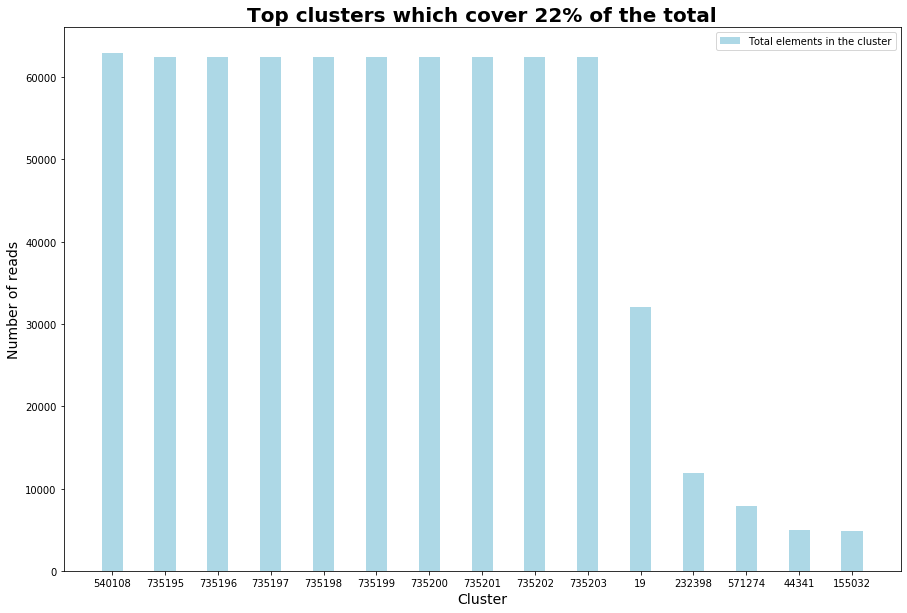

In [84]:
tot_reads = len(l) # number of read clustered
read = 0 # read counter
threshold = 22 # percentage threshold  

cluster_to_show = [] # list of [cluster, cardinality] pairs 

for cluster, cardinality in sorted_dict.items():
    
    read = read + cardinality
    
    if read / tot_reads * 100 <= threshold:
        cluster_to_show.append([cluster, cardinality])
        
    else:
        break

print("len of cluster_to_show list: ", len(cluster_to_show))
print("cluster_to_show list:")
print(cluster_to_show)

plotALot(cluster_to_show,threshold)

#in this way I can show clusters which cover the "threshold" part of the entire reads.